# Complex Integration

## Introduction

Complex integration is a cornerstone of complex analysis, extending the concept of integration from real-valued functions to functions of a complex variable. The theory of complex integration leads to powerful results including Cauchy's integral theorem, Cauchy's integral formula, and the residue theorem—tools that have profound applications in physics, engineering, and pure mathematics.

## Contour Integrals

A **contour integral** (or path integral) of a complex function $f(z)$ along a curve $\gamma$ in the complex plane is defined as:

$$\oint_\gamma f(z)\, dz = \int_a^b f(\gamma(t))\, \gamma'(t)\, dt$$

where $\gamma: [a, b] \to \mathbb{C}$ is a parametrization of the contour.

## Cauchy's Integral Theorem

If $f(z)$ is **analytic** (holomorphic) throughout a simply connected domain $D$, then for any closed contour $\gamma$ in $D$:

$$\oint_\gamma f(z)\, dz = 0$$

This remarkable result states that the integral of an analytic function around any closed loop is zero.

## Cauchy's Integral Formula

For a function $f(z)$ analytic inside and on a simple closed contour $\gamma$, and for any point $z_0$ inside $\gamma$:

$$f(z_0) = \frac{1}{2\pi i} \oint_\gamma \frac{f(z)}{z - z_0}\, dz$$

This formula allows us to compute the value of an analytic function at any interior point from its values on the boundary.

## The Residue Theorem

For a function $f(z)$ with isolated singularities $z_1, z_2, \ldots, z_n$ inside a closed contour $\gamma$:

$$\oint_\gamma f(z)\, dz = 2\pi i \sum_{k=1}^n \text{Res}(f, z_k)$$

where $\text{Res}(f, z_k)$ is the **residue** of $f$ at $z_k$. For a simple pole at $z_k$:

$$\text{Res}(f, z_k) = \lim_{z \to z_k} (z - z_k) f(z)$$

## Applications

The residue theorem is particularly powerful for evaluating real integrals that are difficult or impossible to compute by elementary methods. In this notebook, we will demonstrate these concepts through numerical computation and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11

## Example 1: Verifying Cauchy's Integral Theorem

Let's verify that the integral of an analytic function around a closed contour is zero. We'll integrate $f(z) = z^2$ around a unit circle.

In [2]:
def contour_integral(f, gamma, dgamma, t_range, n_points=1000):
    """
    Numerically compute a contour integral using the parametric form.
    
    Parameters:
    -----------
    f : callable
        Complex function to integrate
    gamma : callable
        Parametrization of the contour
    dgamma : callable
        Derivative of gamma (tangent to contour)
    t_range : tuple
        (t_start, t_end) parameter range
    n_points : int
        Number of points for numerical integration
    
    Returns:
    --------
    complex : Value of the contour integral
    """
    t = np.linspace(t_range[0], t_range[1], n_points)
    integrand = f(gamma(t)) * dgamma(t)
    
    # Use trapezoidal rule
    real_part = np.trapz(integrand.real, t)
    imag_part = np.trapz(integrand.imag, t)
    
    return real_part + 1j * imag_part

# Unit circle: gamma(t) = e^(it) for t in [0, 2π]
gamma_circle = lambda t: np.exp(1j * t)
dgamma_circle = lambda t: 1j * np.exp(1j * t)

# Analytic function: f(z) = z^2
f_analytic = lambda z: z**2

result = contour_integral(f_analytic, gamma_circle, dgamma_circle, (0, 2*np.pi))
print(f"Integral of z² around unit circle: {result:.6f}")
print(f"Expected (Cauchy's theorem): 0")
print(f"Numerical error: {abs(result):.2e}")

Integral of z² around unit circle: 0.000000-0.000000j
Expected (Cauchy's theorem): 0
Numerical error: 2.22e-16


/tmp/ipykernel_152648/28288690.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  real_part = np.trapz(integrand.real, t)
/tmp/ipykernel_152648/28288690.py:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  imag_part = np.trapz(integrand.imag, t)


## Example 2: Cauchy's Integral Formula

We'll verify Cauchy's integral formula by computing $f(z_0)$ for $f(z) = e^z$ at $z_0 = 0$:

$$f(0) = \frac{1}{2\pi i} \oint_{|z|=1} \frac{e^z}{z}\, dz$$

We know that $e^0 = 1$, so the integral should equal $2\pi i$.

In [3]:
# Function for Cauchy's formula: f(z)/(z - z_0)
z0 = 0
f_exp = lambda z: np.exp(z)
cauchy_integrand = lambda z: f_exp(z) / (z - z0)

result = contour_integral(cauchy_integrand, gamma_circle, dgamma_circle, (0, 2*np.pi))
computed_f_z0 = result / (2 * np.pi * 1j)

print(f"Contour integral: {result:.6f}")
print(f"Computed f(0) = integral/(2πi): {computed_f_z0:.6f}")
print(f"Actual f(0) = e^0 = {np.exp(0):.6f}")
print(f"Error: {abs(computed_f_z0 - np.exp(0)):.2e}")

Contour integral: 0.000000+6.283185j
Computed f(0) = integral/(2πi): 1.000000+0.000000j
Actual f(0) = e^0 = 1.000000
Error: 0.00e+00


/tmp/ipykernel_152648/28288690.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  real_part = np.trapz(integrand.real, t)
/tmp/ipykernel_152648/28288690.py:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  imag_part = np.trapz(integrand.imag, t)


## Example 3: The Residue Theorem

Consider the function:

$$f(z) = \frac{1}{z^2 + 1} = \frac{1}{(z - i)(z + i)}$$

This has simple poles at $z = \pm i$. We'll compute the integral around a circle of radius 2 centered at the origin, which encloses both poles.

The residues are:
- At $z = i$: $\text{Res}(f, i) = \lim_{z \to i} (z - i) \cdot \frac{1}{(z-i)(z+i)} = \frac{1}{2i}$
- At $z = -i$: $\text{Res}(f, -i) = \lim_{z \to -i} (z + i) \cdot \frac{1}{(z-i)(z+i)} = \frac{1}{-2i}$

Sum of residues: $\frac{1}{2i} + \frac{1}{-2i} = 0$

Therefore: $\oint_{|z|=2} \frac{dz}{z^2+1} = 2\pi i \cdot 0 = 0$

In [4]:
# Function with poles at ±i
f_poles = lambda z: 1 / (z**2 + 1)

# Circle of radius 2
gamma_r2 = lambda t: 2 * np.exp(1j * t)
dgamma_r2 = lambda t: 2j * np.exp(1j * t)

result = contour_integral(f_poles, gamma_r2, dgamma_r2, (0, 2*np.pi))

# Calculate residues analytically
res_i = 1 / (2j)  # Residue at z = i
res_minus_i = 1 / (-2j)  # Residue at z = -i
expected = 2 * np.pi * 1j * (res_i + res_minus_i)

print(f"Numerical integral: {result:.6f}")
print(f"Residue at z=i: {res_i:.6f}")
print(f"Residue at z=-i: {res_minus_i:.6f}")
print(f"Sum of residues: {res_i + res_minus_i:.6f}")
print(f"Expected (2πi × sum): {expected:.6f}")

Numerical integral: 0.000000-0.000000j
Residue at z=i: 0.000000-0.500000j
Residue at z=-i: -0.000000+0.500000j
Sum of residues: 0.000000+0.000000j
Expected (2πi × sum): 0.000000+0.000000j


/tmp/ipykernel_152648/28288690.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  real_part = np.trapz(integrand.real, t)
/tmp/ipykernel_152648/28288690.py:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  imag_part = np.trapz(integrand.imag, t)


## Example 4: Integral Enclosing One Pole

Now let's compute the same integral but with a contour that only encloses the pole at $z = i$ (upper half-plane). We use a semicircular contour.

In [5]:
# Semicircle in upper half-plane + real axis
def semicircle_integral(f, R, n_points=1000):
    """
    Compute integral over semicircular contour in upper half-plane.
    """
    # Arc part: from 0 to π
    t_arc = np.linspace(0, np.pi, n_points)
    gamma_arc = R * np.exp(1j * t_arc)
    dgamma_arc = 1j * R * np.exp(1j * t_arc)
    integrand_arc = f(gamma_arc) * dgamma_arc
    arc_integral = np.trapz(integrand_arc, t_arc)
    
    # Real axis part: from R to -R
    x_real = np.linspace(R, -R, n_points)
    integrand_real = f(x_real) * (-1)  # dx is negative direction
    # Actually, we integrate from -R to R on real axis (positive direction)
    x_real = np.linspace(-R, R, n_points)
    integrand_real = f(x_real)
    real_integral = np.trapz(integrand_real, x_real)
    
    return arc_integral + real_integral

R = 2
result = semicircle_integral(f_poles, R)

# Only the pole at z=i is enclosed
expected = 2 * np.pi * 1j * res_i

print(f"Semicircular contour integral (R={R}): {result:.6f}")
print(f"Expected (2πi × Res at i): {expected:.6f}")
print(f"Error: {abs(result - expected):.2e}")

Semicircular contour integral (R=2): 3.141592+0.000000j
Expected (2πi × Res at i): 3.141593+0.000000j
Error: 8.23e-07


/tmp/ipykernel_152648/2911907535.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  arc_integral = np.trapz(integrand_arc, t_arc)
/tmp/ipykernel_152648/2911907535.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  real_integral = np.trapz(integrand_real, x_real)


## Example 5: Evaluating Real Integrals

One of the most powerful applications of the residue theorem is evaluating real integrals. Consider:

$$\int_{-\infty}^{\infty} \frac{dx}{x^2 + 1} = \pi$$

Using the residue theorem with a semicircular contour in the upper half-plane, as $R \to \infty$, the arc integral vanishes, and we get:

$$\int_{-\infty}^{\infty} \frac{dx}{x^2 + 1} = 2\pi i \cdot \text{Res}\left(\frac{1}{z^2+1}, i\right) = 2\pi i \cdot \frac{1}{2i} = \pi$$

In [6]:
# Direct numerical integration on real line
from scipy.integrate import quad

f_real = lambda x: 1 / (x**2 + 1)
result_quad, error = quad(f_real, -np.inf, np.inf)

# Using residue theorem
result_residue = 2 * np.pi * 1j * res_i

print(f"Direct numerical integration: {result_quad:.6f}")
print(f"Residue theorem result: {result_residue.real:.6f}")
print(f"Exact answer: π = {np.pi:.6f}")

Direct numerical integration: 3.141593
Residue theorem result: 3.141593
Exact answer: π = 3.141593


## Visualization

Let's create a comprehensive visualization showing the contours, poles, and the magnitude of our complex functions.

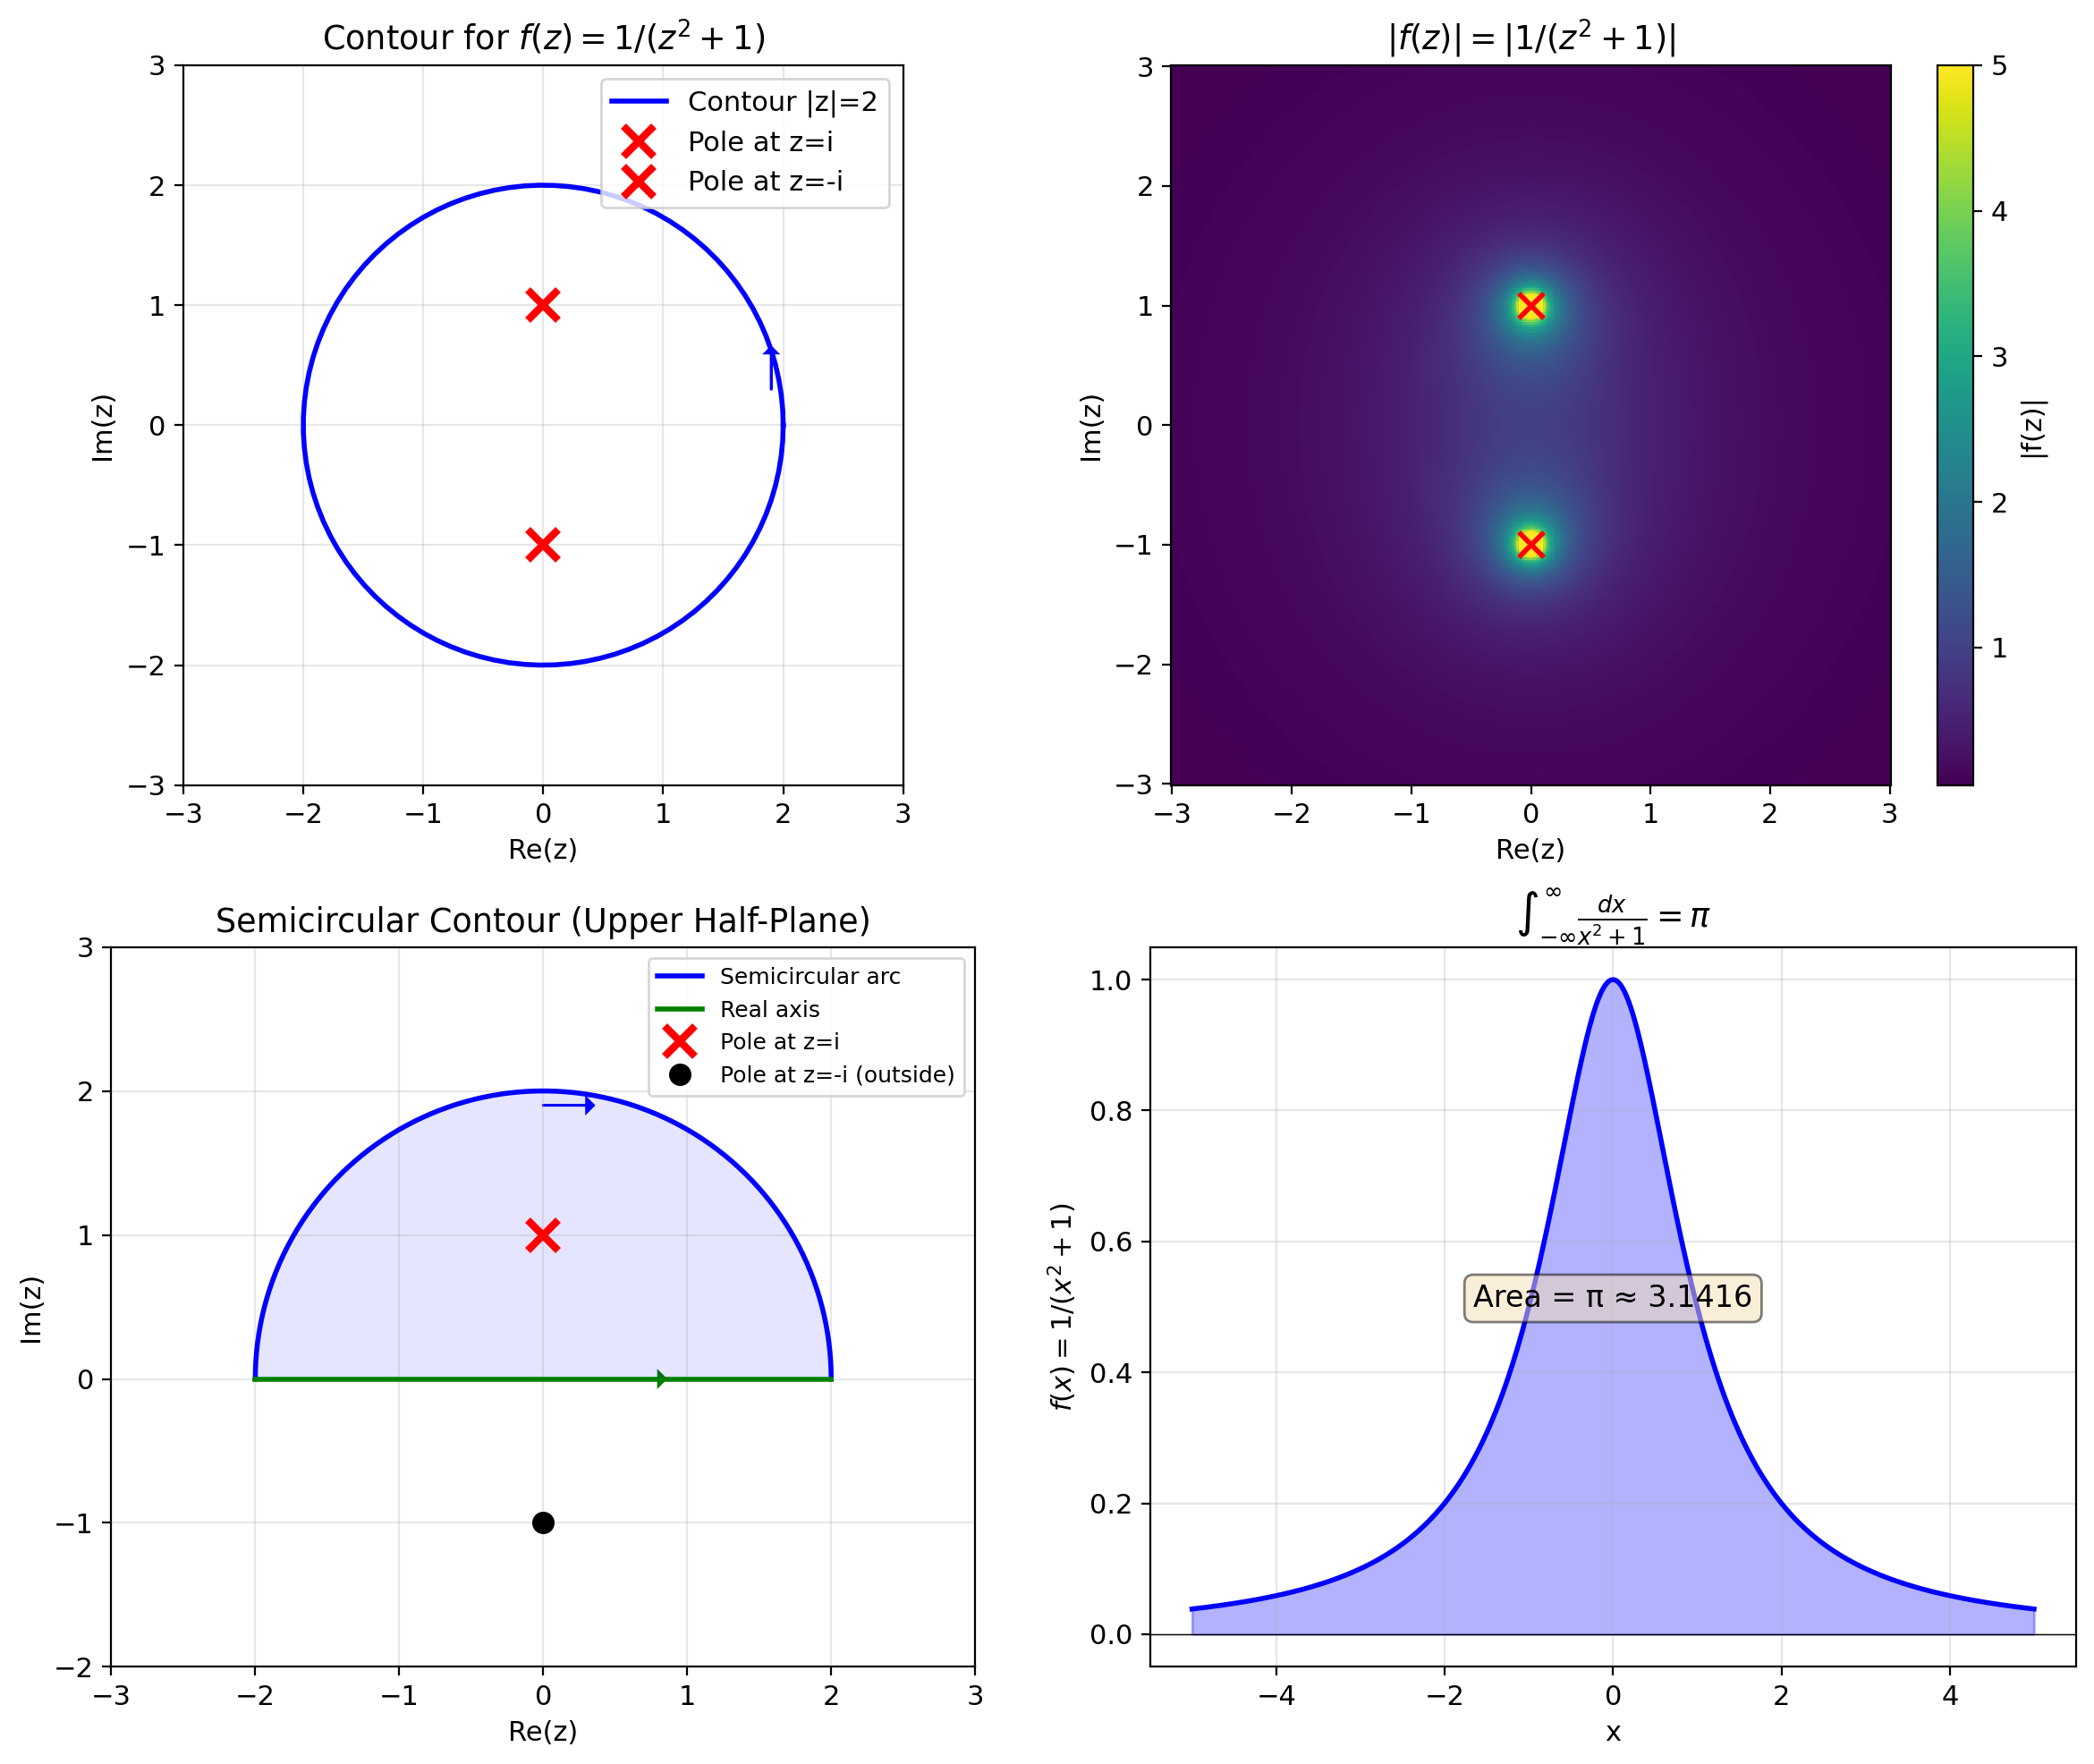


Plot saved to 'plot.png'


In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Contour and poles for f(z) = 1/(z^2 + 1)
ax1 = axes[0, 0]
theta = np.linspace(0, 2*np.pi, 100)
circle_x = 2 * np.cos(theta)
circle_y = 2 * np.sin(theta)
ax1.plot(circle_x, circle_y, 'b-', linewidth=2, label='Contour |z|=2')
ax1.plot([0], [1], 'rx', markersize=12, markeredgewidth=3, label='Pole at z=i')
ax1.plot([0], [-1], 'rx', markersize=12, markeredgewidth=3, label='Pole at z=-i')
ax1.arrow(1.9, 0.3, 0, 0.3, head_width=0.1, head_length=0.05, fc='b', ec='b')
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')
ax1.set_title(r'Contour for $f(z) = 1/(z^2+1)$')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: Magnitude of f(z) = 1/(z^2 + 1)
ax2 = axes[0, 1]
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
# Avoid division by zero near poles
with np.errstate(divide='ignore', invalid='ignore'):
    F = 1 / (Z**2 + 1)
    magnitude = np.abs(F)
    magnitude = np.clip(magnitude, 0, 5)  # Clip for visualization

im2 = ax2.pcolormesh(X, Y, magnitude, shading='auto', cmap='viridis')
ax2.plot([0], [1], 'rx', markersize=10, markeredgewidth=2)
ax2.plot([0], [-1], 'rx', markersize=10, markeredgewidth=2)
plt.colorbar(im2, ax=ax2, label='|f(z)|')
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
ax2.set_title(r'$|f(z)| = |1/(z^2+1)|$')
ax2.set_aspect('equal')

# Plot 3: Semicircular contour
ax3 = axes[1, 0]
theta_semi = np.linspace(0, np.pi, 100)
R = 2
semi_x = R * np.cos(theta_semi)
semi_y = R * np.sin(theta_semi)
ax3.plot(semi_x, semi_y, 'b-', linewidth=2, label='Semicircular arc')
ax3.plot([-R, R], [0, 0], 'g-', linewidth=2, label='Real axis')
ax3.plot([0], [1], 'rx', markersize=12, markeredgewidth=3, label='Pole at z=i')
ax3.plot([0], [-1], 'ko', markersize=8, label='Pole at z=-i (outside)')
ax3.arrow(0, 1.9, 0.3, 0, head_width=0.1, head_length=0.05, fc='b', ec='b')
ax3.arrow(0.5, 0, 0.3, 0, head_width=0.1, head_length=0.05, fc='g', ec='g')
ax3.fill_between(semi_x, 0, semi_y, alpha=0.1, color='blue')
ax3.set_xlim(-3, 3)
ax3.set_ylim(-2, 3)
ax3.set_xlabel('Re(z)')
ax3.set_ylabel('Im(z)')
ax3.set_title('Semicircular Contour (Upper Half-Plane)')
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

# Plot 4: Real integral visualization
ax4 = axes[1, 1]
x_real = np.linspace(-5, 5, 500)
y_real = 1 / (x_real**2 + 1)
ax4.fill_between(x_real, y_real, alpha=0.3, color='blue')
ax4.plot(x_real, y_real, 'b-', linewidth=2)
ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.set_xlabel('x')
ax4.set_ylabel(r'$f(x) = 1/(x^2+1)$')
ax4.set_title(r'$\int_{-\infty}^{\infty} \frac{dx}{x^2+1} = \pi$')
ax4.grid(True, alpha=0.3)
ax4.text(0, 0.5, f'Area = π ≈ {np.pi:.4f}', fontsize=12, ha='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('complex_integration_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Summary

In this notebook, we explored the fundamental concepts of complex integration:

1. **Contour Integrals**: Defined as parametric integrals over curves in the complex plane

2. **Cauchy's Integral Theorem**: The integral of an analytic function over a closed contour is zero

3. **Cauchy's Integral Formula**: Allows computation of function values from boundary integrals

4. **Residue Theorem**: Relates contour integrals to the sum of residues at enclosed poles:
   $$\oint_\gamma f(z)\, dz = 2\pi i \sum_{k} \text{Res}(f, z_k)$$

5. **Applications**: The residue theorem provides an elegant method for evaluating real integrals that are difficult by other means

These tools form the foundation for many advanced techniques in mathematical physics, signal processing, quantum mechanics, and other fields where complex analysis plays a central role.